In [186]:
# -*- coding: utf-8 -*-
from datetime import datetime
from collections import Counter, defaultdict
from itertools import combinations
import json
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3
%matplotlib inline

In [187]:
lang_tags = [
    'indonesia', 'spanish', 'aceh', 'kr', 'cervantes', 'cn', 'deutsch', 'castellano', 'venezuela',
    'tr', 'polish', 'fr', 'myanmar', 'japanese', 'ru', 'pt', 'thai', 'ua',
    'morocco', 'arab', 'pilipinas', 'steemit-austria', 'mexico', 'vn', 'rusteemteam', 'cesky', 'bangladesh',
    'russian', 'hindi', 'br', 'arabic', 'teamserbia', 'steemromania', 'teamukraine', 'filipino', 'serbia'
]

In [188]:
class Post:
    def __init__(self, author, url, total_payout_value, votes, tags, created, lang_code):
        self.author = author
        self.url = url
        self.total_payout_value = total_payout_value
        self.tags = tags
        self.created = created
        self.lang_code = lang_code
        
    def __str__(self):
        return url

In [189]:
def print_table(header, table, fmt, n=None):
    print('|'.join(header))
    print('-|-' * (len(header) - 1))
    for i, row in enumerate(table.most_common(n)):
        print(fmt % (i + 1, row[0], row[1]))

In [190]:
def month_plot(month_dict, sort_by, start, end, ylabel):
    fig, ax = plt.subplots(figsize=(16, 8))
    for tag, counter in list(sorted(month_dict.items(), key=lambda x: sort_by[x[0]], reverse=True))[start:end]:
        plt.plot(months, list(map(lambda m: counter[m], months)), label=tag)
    plt.xlabel('Month')
    plt.ylabel(ylabel)
    plt.title(ylabel + ' through time')
    plt.legend(loc='upper center', bbox_to_anchor=(0.82, 1.17),
              ncol=3, fancybox=True, shadow=True)

In [191]:
fmt = '%Y-%m-%d %H:%M:%S.%f'
posts = []
for lang_tag in lang_tags:
    with open(lang_tag + '.tsv', 'r', encoding='utf8') as f:
        for line in f:
            try:
                v = line.split('\t')
                author = v[0]
                url = v[1]
                total_payout_value = float(v[2])
                votes = [tuple(item.split(':')) for item in v[3].split(',')]
                tags = v[4].split(',')
                created = datetime.strptime(v[5], fmt)
                lang_code = 'en'
                try:
                    for item in json.loads(v[6]):
                        lang_code = item['language']
                        break
                except:
                    pass
                
                posts.append(Post(author, url, total_payout_value, votes, tags, created, lang_code))
            except Exception as ex:
                pass

In [192]:
tag_urls_dict = defaultdict(set)
lang_code_dict = defaultdict(Counter)
lang_tags_set = set(lang_tags)

for post in posts:
    for tag in post.tags:        
        if tag in lang_tags_set:
            tag_urls_dict[tag].add(post.url)
            lang_code_dict[tag][post.lang_code] += 1         

In [193]:
def plot_pie(fig, index, c, t, startangle, size):
    labels = []
    sizes = []
    explode = []
    other = 0

    current_sum = 0
    total = sum(v for v in c.values())

    for k, v in c.most_common():
        if current_sum < 0.9 * total:
            labels.append(k)
            sizes.append(v)
            explode.append(0)
        else:
            other += float(v)
        current_sum += v

    labels.append('Other')
    sizes.append(other)
    explode.append(0)

    fig.set_size_inches(size)
    plt.subplot(3, 3, index)
    plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=startangle)
    plt.title('#' + t, y=1.03, fontsize=13)
    plt.axis('equal')
    plt.tight_layout()

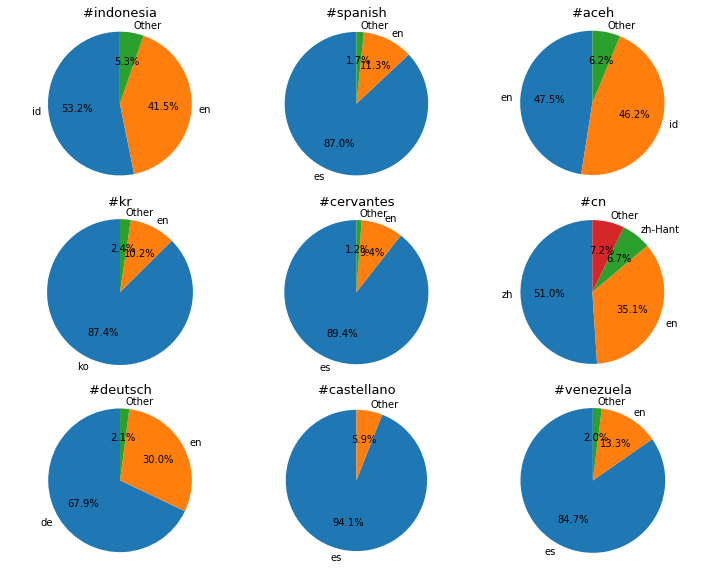

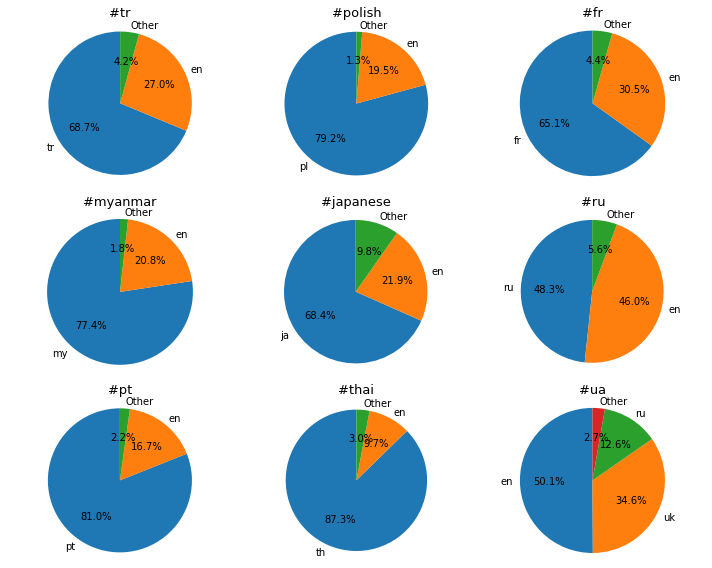

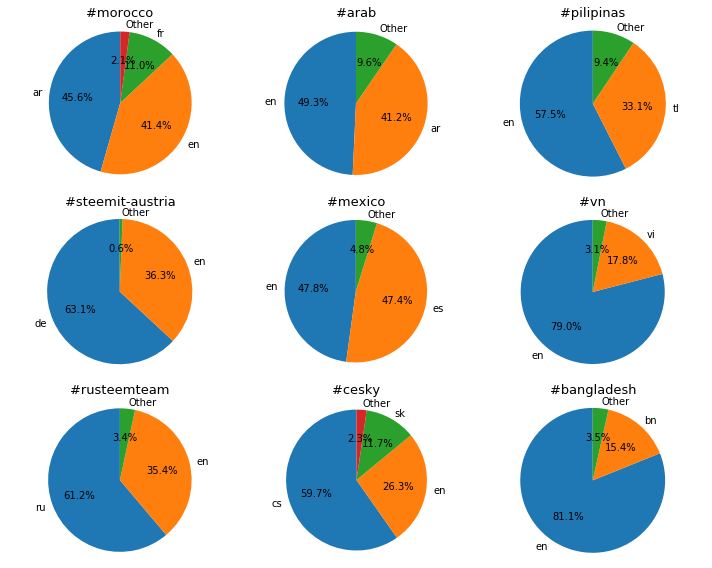

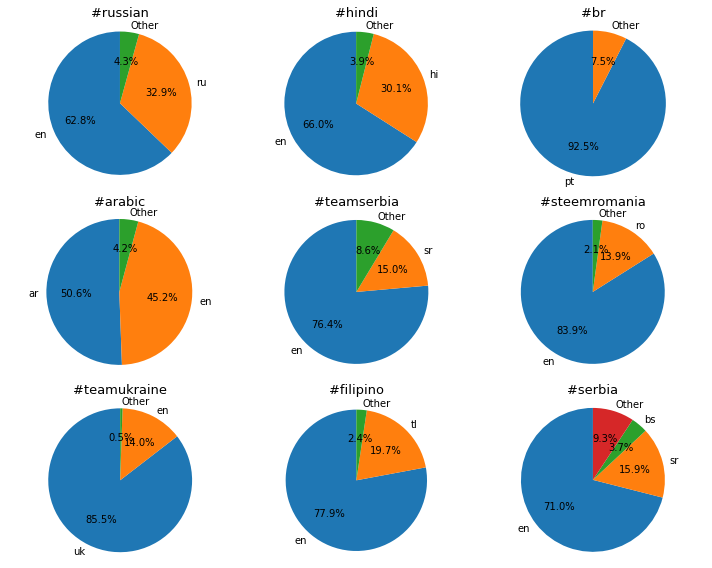

In [194]:
nrows = 3
ncols = 3
for i in range(0, len(lang_tags), nrows * ncols):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols)
    for j, lang_tag in enumerate(lang_tags[i:i+nrows*ncols]):
        plot_pie(fig, j + 1, lang_code_dict[lang_tag], lang_tag, 90, (10, 8)) 
    fig.savefig('lang3x3_' + str(i) + '.png')

In [195]:
main_tag_ratio = dict()

for i, lang_tag in enumerate(lang_tags):
    non_english = 0
    total = sum(lang_code_dict[lang_tag].values())
    for lang_code, cnt in lang_code_dict[lang_tag].most_common():
        if lang_code != 'en':
            main_tag_ratio[lang_tag] = [lang_code, float(cnt / total)]
            break

threshold = 0.3
threshold_marked = False

same_lang_dict = defaultdict(list)

to_remove = set()
            
print('.|Tag|Ratio|Lang')
print('-|-|-|-')
for i, (tag, v) in enumerate(sorted(main_tag_ratio.items(), key=lambda x: x[1][1], reverse=True)):
    lang_code = v[0]
    ratio = v[1]  
    if ratio < threshold:
        to_remove.add(tag)
        if not threshold_marked:
            print('**-**|**-**|**-**|**-**')
            threshold_marked = True
    else:
        same_lang_dict[lang_code].append(tag) 
    print(f"{i+1}|{tag}|{100*ratio:.{3}}|{lang_code}")

.|Tag|Ratio|Lang
-|-|-|-
1|castellano|94.1|es
2|br|92.5|pt
3|cervantes|89.4|es
4|kr|87.4|ko
5|thai|87.3|th
6|spanish|87.0|es
7|teamukraine|85.5|uk
8|venezuela|84.7|es
9|pt|81.0|pt
10|polish|79.2|pl
11|myanmar|77.4|my
12|tr|68.7|tr
13|japanese|68.4|ja
14|deutsch|67.9|de
15|fr|65.1|fr
16|steemit-austria|63.1|de
17|rusteemteam|61.2|ru
18|cesky|59.7|cs
19|indonesia|53.2|id
20|cn|51.0|zh
21|arabic|50.6|ar
22|ru|48.3|ru
23|mexico|47.4|es
24|aceh|46.2|id
25|morocco|45.6|ar
26|arab|41.2|ar
27|ua|34.6|uk
28|pilipinas|33.1|tl
29|russian|32.9|ru
30|hindi|30.1|hi
**-**|**-**|**-**|**-**
31|filipino|19.7|tl
32|vn|17.8|vi
33|serbia|15.9|sr
34|bangladesh|15.4|bn
35|teamserbia|15.0|sr
36|steemromania|13.9|ro


In [196]:
for tag in to_remove:
    lang_tags.remove(tag)
lang_tags_set = set(lang_tags)

es : castellano, cervantes, spanish, venezuela, mexico
pt : br, pt
uk : teamukraine, ua
de : deutsch, steemit-austria
ru : rusteemteam, ru, russian
id : indonesia, aceh
ar : arabic, morocco, arab


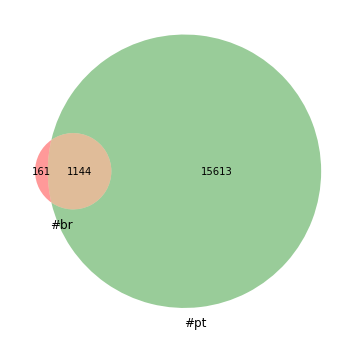

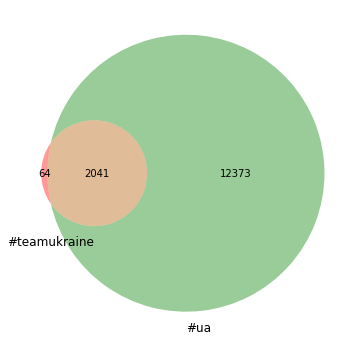

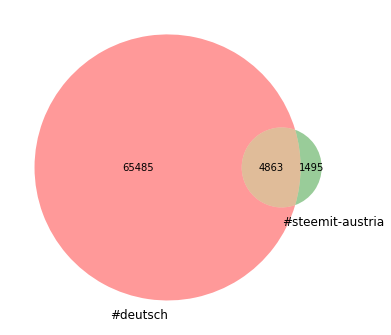

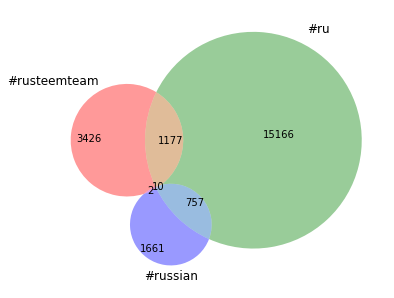

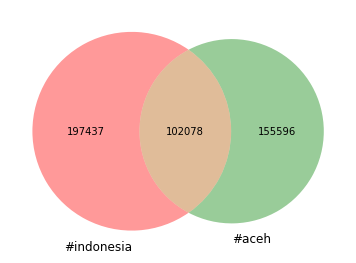

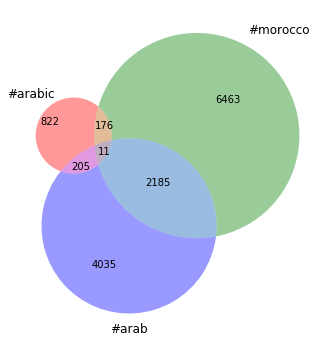

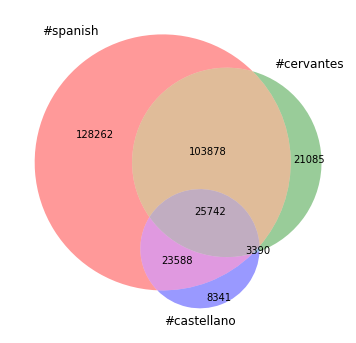

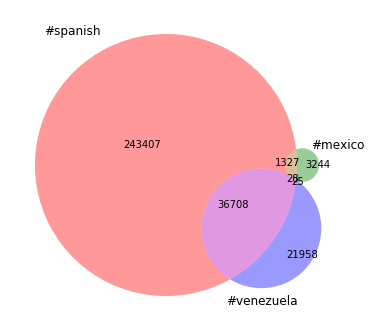

In [197]:
for lang_code, tags in same_lang_dict.items():
    if len(tags) > 1:
        print(lang_code, ':', ', '.join(tags))

def plot_venn(tags):
    plt.figure(figsize=(6, 6))
    fn = venn2 if len(tags) == 2 else venn3
    fn([tag_urls_dict[tag] for tag in tags], map(lambda t: '#' + t, tags))
    plt.show()
    
for lang_code, tags in same_lang_dict.items():  
    if 2 <= len(tags) <= 3:
        plot_venn(tags)
            
plot_venn(['spanish', 'cervantes', 'castellano'])
plot_venn(['spanish', 'mexico', 'venezuela'])

In [198]:
for tag1, tag2 in combinations(lang_tags, 2):
    comm = len(tag_urls_dict[tag1] & tag_urls_dict[tag2])
    if len(tag_urls_dict[tag2]) == 0:
        continue
    r = 100 * float(comm) / len(tag_urls_dict[tag2])
    if r > 90:
        print("The common part for #%s and #%s is %.2f%%" % (tag1, tag2, r))
        lang_tags.remove(tag2)

The common part for #ua and #teamukraine is 96.96%


In [199]:
post_counter = Counter()
payout_counter = Counter()
average_payout_counter = Counter()

author_dict = defaultdict(set)

months = set()
month_post_dict = defaultdict(Counter)
month_payout_dict = defaultdict(Counter)
month_average_payout_dict = defaultdict(Counter)
month_author_dict_s = defaultdict(lambda: defaultdict(set))
month_author_dict = defaultdict(Counter)

possible_prefixes = {
    'kr', 'cn', 'tr', 'fr', 'ru', 'pt',
    'ua', 'br', 'pl', 'es', 'de', 'jp'
}

used_prefixes = set()
unique_prefix_tag_dict = defaultdict(set)
prefix_tags = Counter()

for post in posts:
    for tag in post.tags:        
        if tag in lang_tags_set:
            
            month = str(post.created)[:7]
            months.add(month)
            
            month_post_dict[tag][month] += 1
            month_payout_dict[tag][month] += post.total_payout_value
            
            post_counter[tag] += 1
            payout_counter[tag] += post.total_payout_value
            author_dict[tag].add(post.author)
            month_author_dict_s[tag][month].add(post.author)          
            
        for possible_prefix in possible_prefixes:
            if tag.startswith(possible_prefix + '-'):
                used_prefixes.add(possible_prefix)
                prefix_tags[tag] += 1
                unique_prefix_tag_dict[possible_prefix].add(tag)

for tag in lang_tags:
    average_payout_counter[tag] = payout_counter[tag] /  post_counter[tag]
    for month in months:
        if month_post_dict[tag][month] > 0:
            month_average_payout_dict[tag][month] = month_payout_dict[tag][month] / month_post_dict[tag][month]
        else:
            month_average_payout_dict[tag][month] = 0
        month_author_dict[tag][month] = len(month_author_dict_s[tag][month])
        
author_counter = Counter()

for tag, v in author_dict.items():
    author_counter[tag] = len(author_dict[tag])
    
months = sorted(list(months))

In [200]:
print_markdown(['.', 'Tag', 'Posts'], post_counter, '%d|%s|%d')

.|Tag|Posts
-|--|-
1|spanish|506603
2|indonesia|407362
3|aceh|364128
4|cervantes|336008
5|kr|249492
6|castellano|153505
7|venezuela|130094
8|cn|79019
9|deutsch|77069
10|tr|58423
11|polish|29788
12|ru|21432
13|japanese|20931
14|fr|20873
15|myanmar|20638
16|ua|18228
17|pt|18212
18|thai|17132
19|morocco|11397
20|steemit-austria|11280
21|arab|9373
22|mexico|6830
23|pilipinas|6441
24|rusteemteam|5873
25|teamukraine|4148
26|cesky|4057
27|russian|3266
28|br|2477
29|hindi|2001
30|arabic|1673


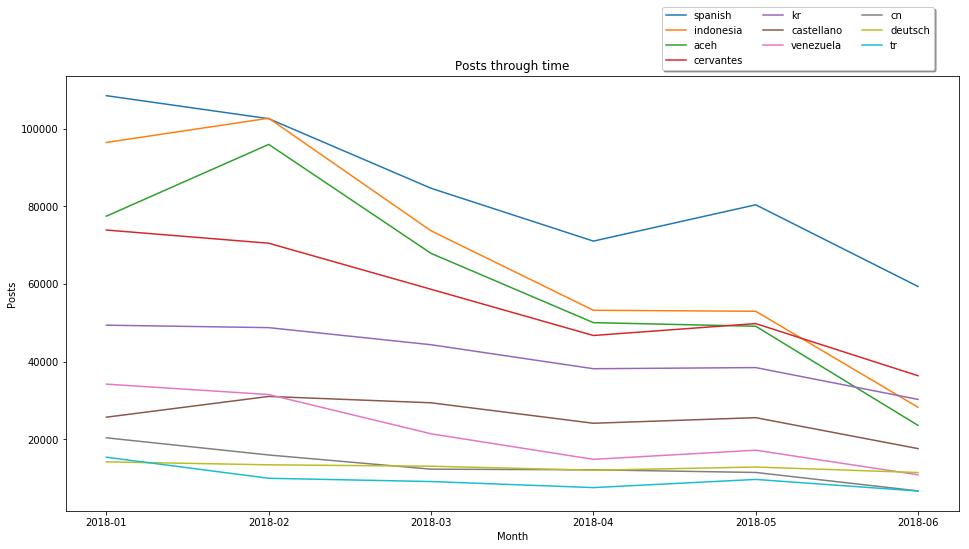

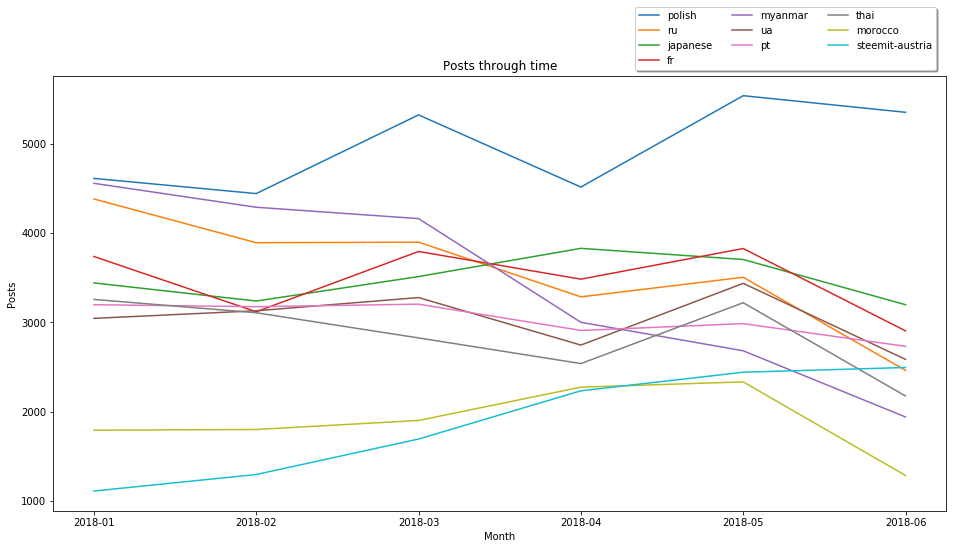

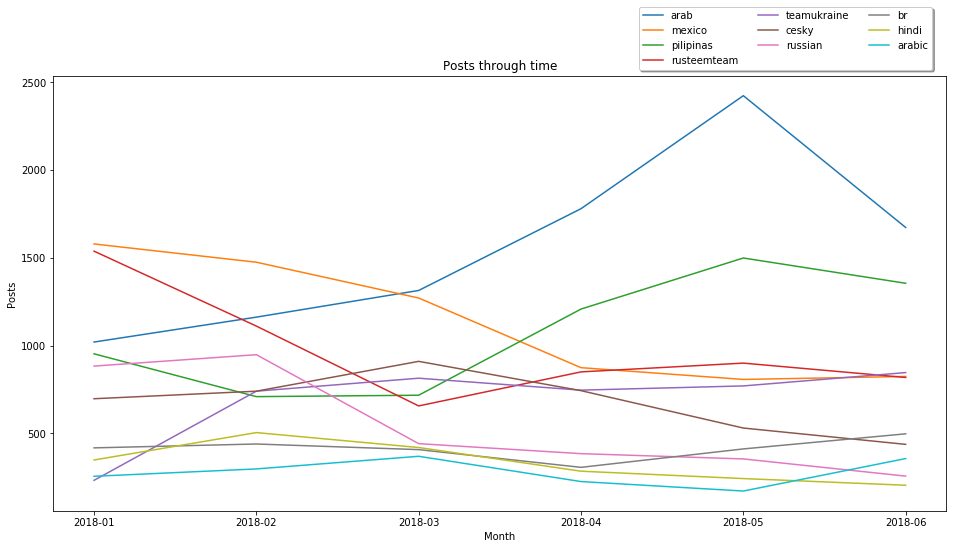

In [201]:
for i in range(0, len(lang_tags), 10):
    month_plot(month_post_dict, post_counter, i, i + 10, 'Posts')

In [202]:
print_table(['.', 'Tag', 'Payouts'], payout_counter, '%d|%s|%.0f')

.|Tag|Payouts
-|--|-
1|kr|1083986
2|spanish|866743
3|cervantes|595838
4|cn|512632
5|indonesia|308189
6|deutsch|285426
7|castellano|236546
8|tr|192595
9|aceh|178947
10|venezuela|125335
11|fr|112989
12|japanese|84742
13|pt|77689
14|ru|69141
15|steemit-austria|65536
16|myanmar|60321
17|polish|53892
18|ua|53185
19|thai|37895
20|morocco|34898
21|mexico|28552
22|arab|27777
23|br|24944
24|cesky|12603
25|pilipinas|10164
26|rusteemteam|9695
27|hindi|4102
28|russian|2615
29|teamukraine|2145
30|arabic|1460


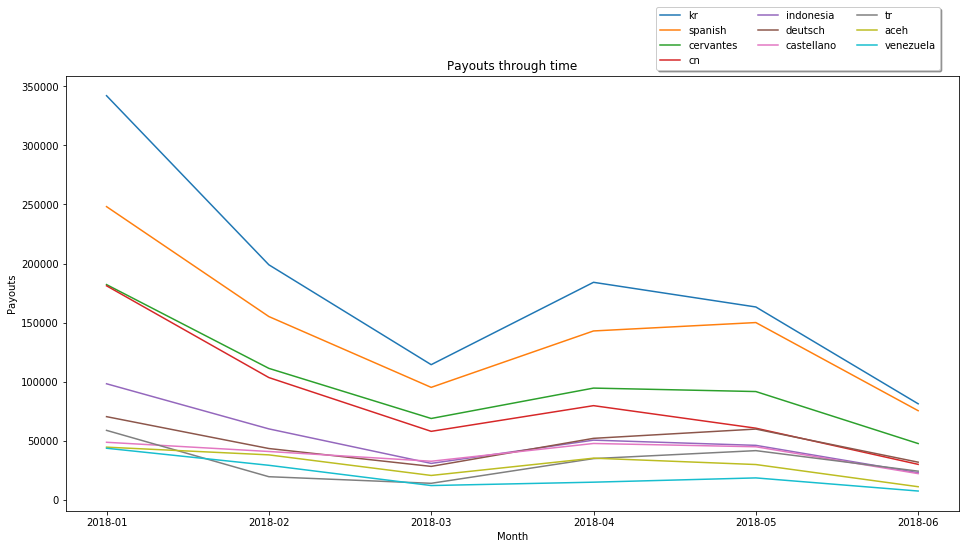

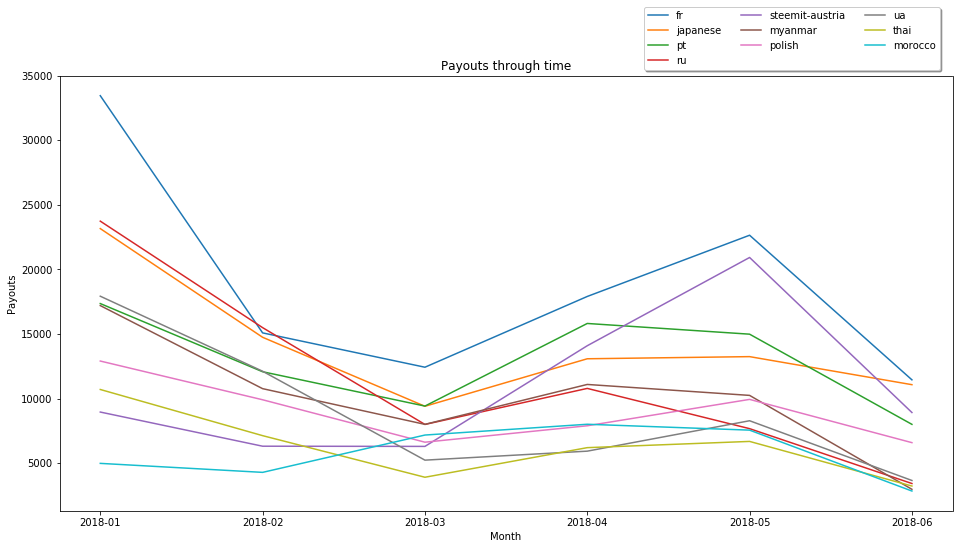

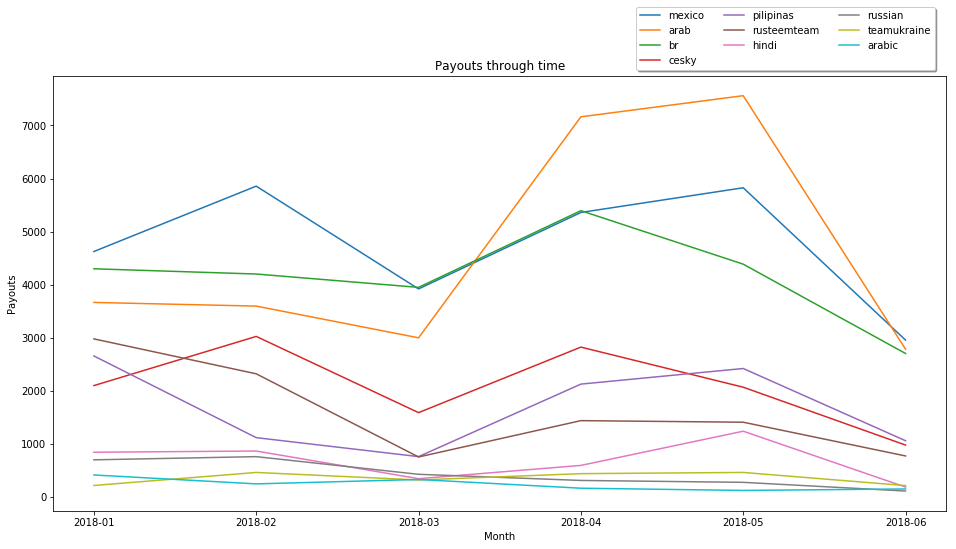

In [203]:
for i in range(0, len(lang_tags), 10):
    month_plot(month_payout_dict, payout_counter, i, i + 10, 'Payouts')

In [204]:
print_table(['.', 'Tag', 'Average payout per post'], average_payout_counter, '%d|%s|%.3f')

.|Tag|Average payout per post
-|--|-
1|br|10.070
2|cn|6.487
3|steemit-austria|5.810
4|fr|5.413
5|kr|4.345
6|pt|4.266
7|mexico|4.180
8|japanese|4.049
9|deutsch|3.704
10|tr|3.297
11|ru|3.226
12|cesky|3.107
13|morocco|3.062
14|arab|2.964
15|myanmar|2.923
16|ua|2.918
17|thai|2.212
18|hindi|2.050
19|polish|1.809
20|cervantes|1.773
21|spanish|1.711
22|rusteemteam|1.651
23|pilipinas|1.578
24|castellano|1.541
25|venezuela|0.963
26|arabic|0.873
27|russian|0.801
28|indonesia|0.757
29|aceh|0.491


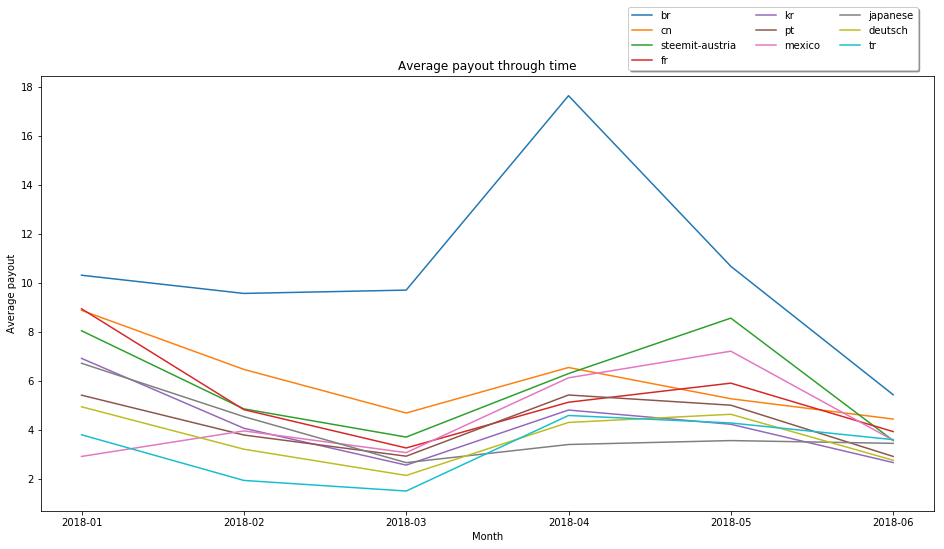

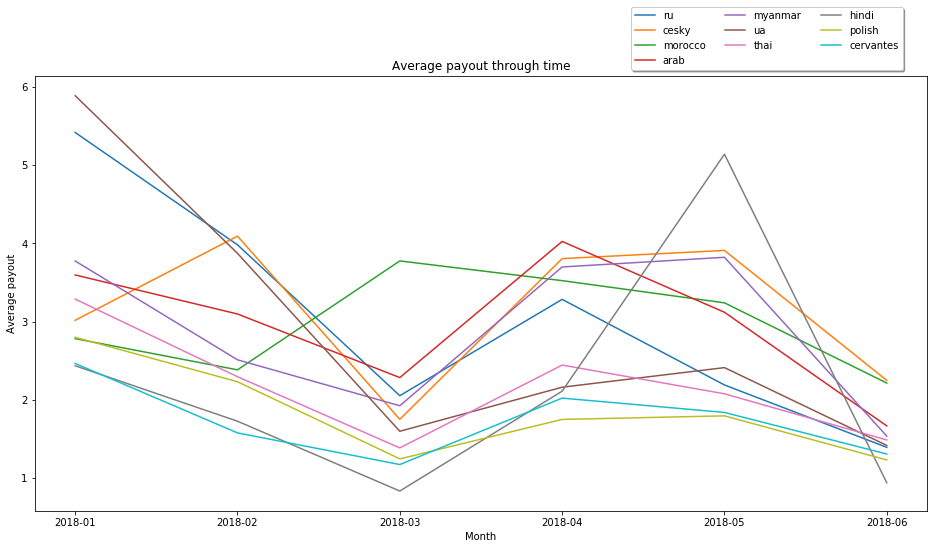

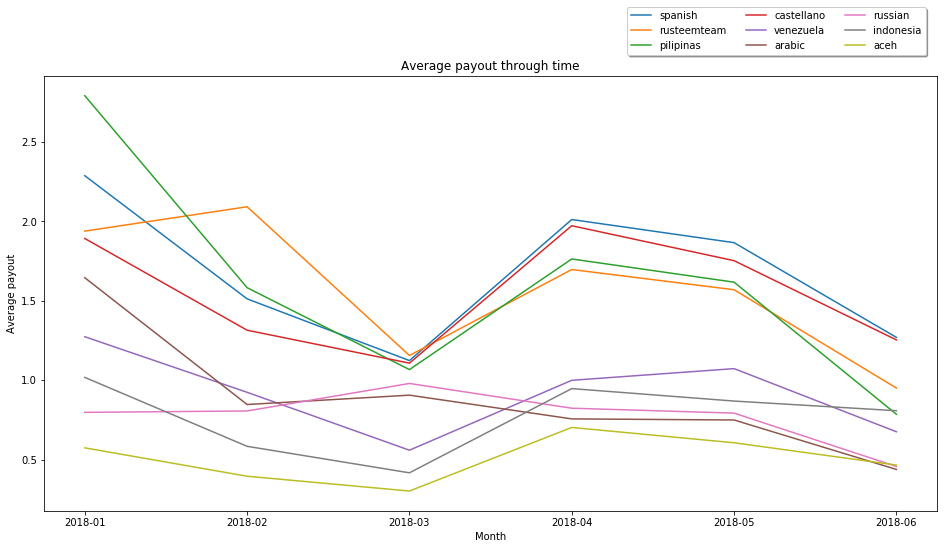

In [205]:
for i in range(0, len(lang_tags), 10):
    month_plot(month_average_payout_dict, average_payout_counter, i, i + 10, 'Average payout')

In [206]:
print_table(['.', 'Tag', 'Authors'], author_counter, '%d|%s|%d')

.|Tag|Authors
-|--|-
1|spanish|22315
2|indonesia|20511
3|aceh|19852
4|cervantes|13775
5|kr|13761
6|venezuela|10520
7|castellano|7052
8|cn|5451
9|deutsch|4497
10|tr|3496
11|polish|2488
12|japanese|2020
13|mexico|1468
14|fr|1450
15|myanmar|1409
16|thai|1070
17|ru|1051
18|pt|799
19|russian|666
20|arab|646
21|morocco|590
22|pilipinas|475
23|hindi|469
24|steemit-austria|401
25|arabic|342
26|ua|330
27|rusteemteam|210
28|br|191
29|cesky|132
30|teamukraine|27


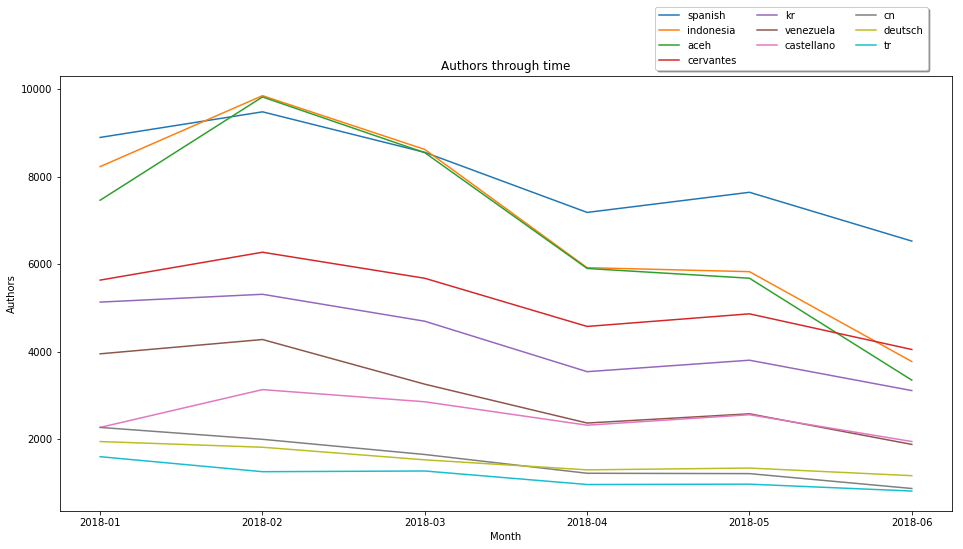

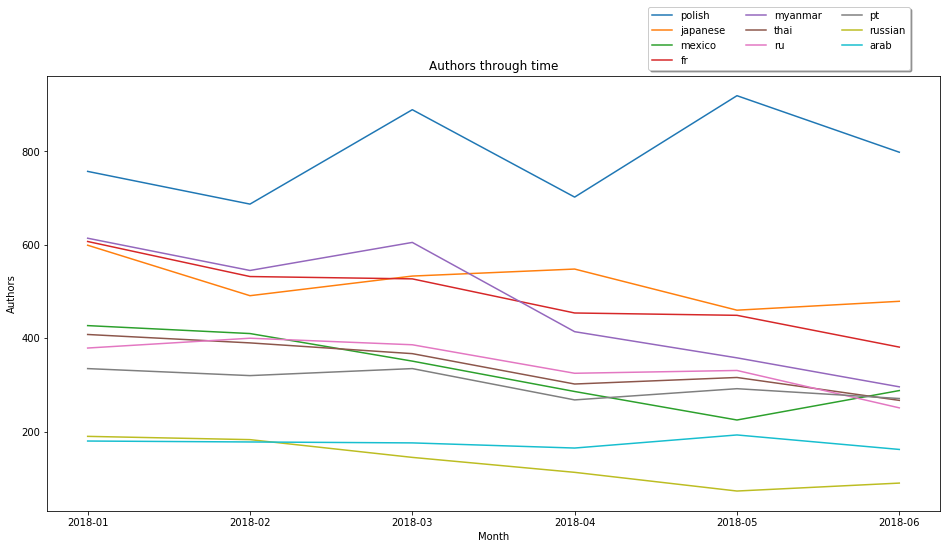

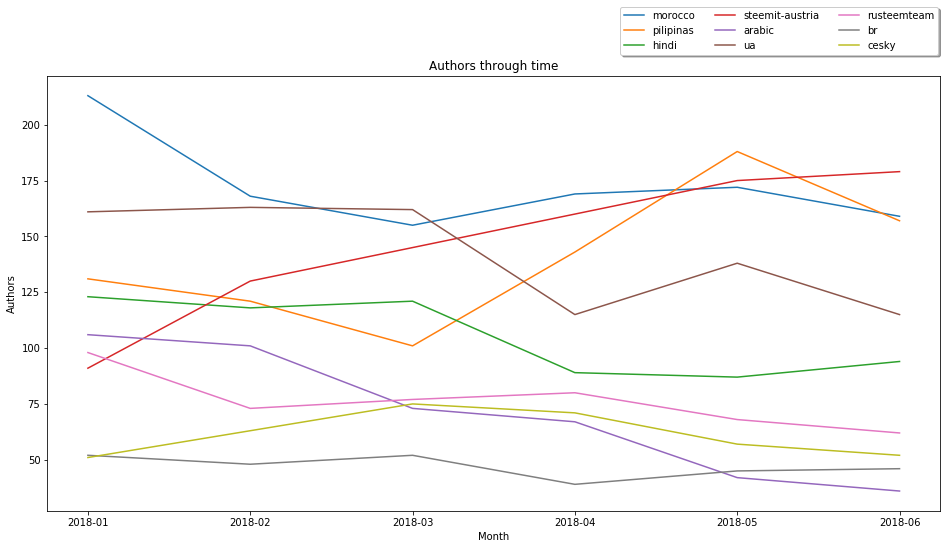

In [207]:
for i in range(0, len(lang_tags), 10):
    month_plot(month_author_dict, author_counter, i, i + 10, 'Authors')

In [208]:
unique_prefix_tag_counter = Counter()

for k, v in unique_prefix_tag_dict.items():
    unique_prefix_tag_counter[k] = len(v)
    
print_table(['.', 'Prefix', 'Count'], unique_prefix_tag_counter, '%d|%s|%d')
print('\n')
print_table(['.', 'Prefix-tag', 'Count'], prefix_tags, '%d|#%s|%d', 30)

.|Prefix|Count
-|--|-
1|kr|2302
2|pl|815
3|cn|221
4|ru|168
5|jp|64
6|de|31
7|tr|24
8|pt|12
9|fr|8
10|ua|5
11|es|5


.|Prefix-tag|Count
-|--|-
1|#kr-newbie|83291
2|#kr-life|23164
3|#kr-writing|19077
4|#kr-event|13164
5|#cn-reader|13133
6|#kr-daily|12263
7|#kr-art|8748
8|#kr-travel|7077
9|#kr-food|6037
10|#pl-artykuly|5987
11|#kr-pen|5678
12|#kr-coin|5494
13|#kr-join|5484
14|#kr-news|5011
15|#jp-newbie|4171
16|#kr-overseas|4055
17|#kr-diary|3812
18|#kr-gazua|3752
19|#kr-series|2980
20|#kr-funfun|2738
21|#kr-dev|2665
22|#kr-book|2601
23|#kr-youth|2563
24|#kr-story|2355
25|#cn-malaysia|1957
26|#kr-economy|1777
27|#kr-hobby|1708
28|#kr-steemit|1706
29|#kr-game|1693
30|#pl-fotografia|1612
